<a href="https://colab.research.google.com/github/BillyOtieno/100projects/blob/master/LSTM_Networks_for_Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Import Libraries
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import urllib.request, json
import os
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

In [12]:
## AlphaVantage API Key -- IZ8AFDV2006AHVBM
datasource = 'alphavantage'

if datasource == 'alphavantage':
  # Loading data from alphavantage
  api_key = 'IZ8AFDV2006AHVBM'
  
  # Americal Airline Stock Market Prices
  ticker = "AAL"
  
  url_string = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=%s&outputsize=full&apikey=%s"%(ticker,api_key)
  file_to_save = f"stock_market_data_{ticker}.csv"
  
  if not os.path.exists(file_to_save):
    with urllib.request.urlopen(url_string) as url:
      data = json.loads(url.read().decode())
      
      # Extract stock market data
      data = data['Time Series (Daily)']
      df = pd.DataFrame(columns=['Date', 'Low', 'High', 'Close', 'Open'])
      for k, v in data.items():
        date = dt.datetime.strptime(k, '%Y-%m-%d')
        data_row = [date.date(),float(v['3. low']),float(v['2. high']),
                   float(v['4. close']),float(v['1. open'])]
        df.loc[-1,:] = data_row
        df.index = df.index + 1
        
      print(f"Data Saved to {file_to_save}")
      df.to_csv(file_to_save)
  else:
    print("File already exists, loading data from csv")
    df = pd.read_csv(file_to_save)
    
else:
    df = pd.read_csv(os.path.join('Stocks','hpq.us.txt'),delimiter=',',usecols=['Date','Open','High','Low','Close'])
    print('Loaded data from the Kaggle repository')
  
  

Data Saved to stock_market_data_AAL.csv


In [13]:
df.head()

,Date,Low,High,Close,Open
3341,2019-01-07,31.24,33.4804,33.17,31.99
3340,2019-01-04,30.4,32.09,32.04,30.44
3339,2019-01-03,28.81,31.8535,30.06,31.69
3338,2019-01-02,31.05,32.65,32.48,31.46
3337,2018-12-31,31.68,32.62,32.11,32.09


In [17]:
df.sort_values('Date').head()

,Date,Low,High,Close,Open
0,2005-09-27,19.1,21.4,19.3,21.05
1,2005-09-28,19.2,20.53,20.5,19.3
2,2005-09-29,20.1,20.58,20.21,20.4
3,2005-09-30,20.18,21.05,21.01,20.26
4,2005-10-03,20.9,21.75,21.5,20.9


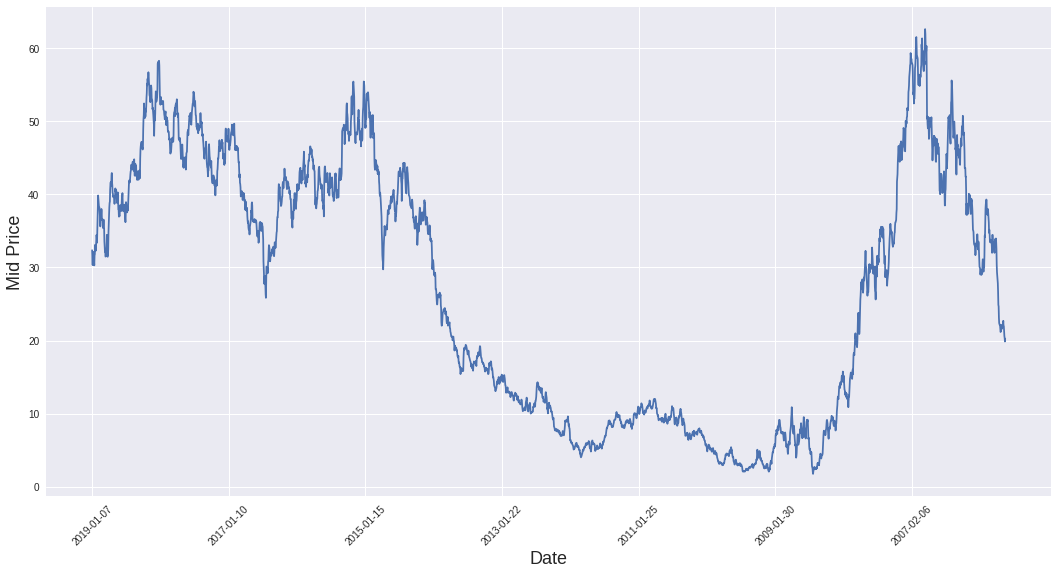

In [18]:
# Visualize the dataset
plt.figure(figsize=(18,9))
plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]),(df['Low']+df['High'])/2.0)
plt.xticks(range(0,df.shape[0],500),df['Date'].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.show()

In [0]:
# First calculate the mid prices from the highest and lowest
high_prices = df.loc[:,'High'].as_matrix()
low_prices = df.loc[:,'Low'].as_matrix()
mid_prices = (high_prices+low_prices)/2.0

In [0]:
# Training data will be the first 11000 data points, testing from 11000 onwards
train_data = mid_prices[:11000]
test_data = mid_prices[11000:]

In [0]:
# Scale the data to be between 0 and 1
# When scaling remember! You normalize both test and train data with respect to training data
# Because you are not supposed to have access to test data
scaler = MinMaxScaler()
train_data = train_data.reshape(-1,1)
test_data = test_data.reshape(-1,1)

In [24]:
# Train the Scaler with training data and smooth data
smoothing_window_size = 2500
for di in range(0,10000,smoothing_window_size):
    scaler.fit(train_data[di:di+smoothing_window_size,:])
    train_data[di:di+smoothing_window_size,:] = scaler.transform(train_data[di:di+smoothing_window_size,:])

# You normalize the last bit of remaining data
scaler.fit(train_data[di+smoothing_window_size:,:])
train_data[di+smoothing_window_size:,:] = scaler.transform(train_data[di+smoothing_window_size:,:])

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


ValueError: ignored